# Simple Moving Average (SMA) Indicator

Exploring the Simple Moving Average indicator using the TA-Lib python library. This blog forms part of an ongoing series, Technical Analysis in Python, where I look into key trading indicators and their practical applications.

The Simple Moving Average (SMA) is a widely used metric that calculates the average price of an asset, typically its closing price, over a specified number of days.

In this blog, I will demonstrate how to compute and utilise SMA with Python’s TA-Lib library, providing valuable insights for algorithmic trading strategies.

## Simple Moving Average: Different Timeperiods

In [1]:
import talib
import numpy as np

# Example prices
prices = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=np.float64)

# Calculate SMA with different timeperiods
sma_5 = talib.SMA(prices, timeperiod=5)
sma_7 = talib.SMA(prices, timeperiod=7)
sma_9 = talib.SMA(prices, timeperiod=9)

# Print the calculated SMA
print("5-period SMA:", sma_5)
print("7-period SMA:", sma_7)
print("9-period SMA:", sma_9)

5-period SMA: [nan nan nan nan 12. 13. 14. 15. 16. 17.]
7-period SMA: [nan nan nan nan nan nan 13. 14. 15. 16.]
9-period SMA: [nan nan nan nan nan nan nan nan 14. 15.]


## Simple Moving Average: Not A Number

In [3]:
import talib
import numpy as np

# Example prices
prices = np.array([np.nan, 11.1, 12.2, 13.3, 14.4, 15.5])

# Calculate 5-period SMA
sma_5 = talib.SMA(prices, timeperiod=5)
print("5-period SMA:", sma_5)

5-period SMA: [ nan  nan  nan  nan  nan 13.3]


## Simple Moving Average: Dictionary Input

In [5]:
import numpy as np
from talib.abstract import SMA

# Example prices
inputs = {
    'open': np.array([2, 3, 4, 5, 6, 7], dtype=np.float64),
    'high': np.array([4, 5, 6, 7, 8, 9], dtype=np.float64),
    'low': np.array([1, 2, 3, 4, 5, 6], dtype=np.float64),
    'close': np.array([3, 4, 5, 6, 7, 8], dtype=np.float64),
    'volume': np.array([5, 5, 5, 5, 5, 5], dtype=np.float64)
}

# Calculate SMA based on different prices
sma_open = SMA(inputs, timeperiod=3, price='open')
sma_high = SMA(inputs, timeperiod=3, price='high')

# Print the calculated SMA
print("SMA Price(Open):", np.round(sma_open, 1))
print("SMA Price(High):", np.round(sma_high, 1))

SMA Price(Open): [nan nan  3.  4.  5.  6.]
SMA Price(High): [nan nan  5.  6.  7.  8.]


## Simple Moving Average: Abstract

Functions can either be imported directly or instantiated by name:


In [8]:
import numpy as np
from talib import abstract

directSMA = abstract.SMA           # reference abstract direct 
nameSMA = abstract.Function('sma') # refrence  abstract by name

# Example prices
prices = np.array([10.0, 11.2, 12.5, 13.8, 15.1, 15.9, 17.4, 18.6, 19.3, 20.8], dtype=np.float64)

# Calculate SMA based on different prices
sma_set1 = directSMA(inputs, timeperiod=3)
sma_set2 = nameSMA(inputs, timeperiod=3)

# Print the calculated SMA
print("SMA Direct:", np.round(sma_set1, 1))
print("SMA Name:", np.round(sma_set2, 1))

SMA Direct: [nan nan  4.  5.  6.  7.]
SMA Name: [nan nan  4.  5.  6.  7.]


## Simple Moving Average: Generralised Function

TALIB.MA - Moving Average - matype=0 by default...
- 0 = SMA (Simple Moving Average) (Default)
- 1 = EMA (Exponential Moving Average)
- 2 = WMA (Weighted Moving Average)
- 3 = DEMA (Double Exponential Moving Average)
- 4 = TEMA (Triple Exponential Moving Average)
- 5 = TRIMA (Triangular Moving Average)
- 6 = KAMA (Kaufman Adaptive Moving Average)
- 7 = MAMA (MESA Adaptive Moving Average)
- 8 = T3 (Triple Exponential Moving Average)    

In [9]:
import talib
import numpy as np

# Example prices
prices = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=np.float64)

# Calculate 5-period SMA using MA (SME=0)
sma_5 = talib.MA(prices, timeperiod=5)
print("5-period SMA using MA (Default):", sma_5)

sma_5 = talib.MA(prices, timeperiod=5, matype=0)
print("5-period SMA using MA (SMA):", sma_5)

5-period SMA using MA (Default): [nan nan nan nan 12. 13. 14. 15. 16. 17.]
5-period SMA using MA (SMA): [nan nan nan nan 12. 13. 14. 15. 16. 17.]


## 

# Simple Moving Average: BTC-USD Data & Financial Chart

In [10]:
import plotly.graph_objects as go
import talib
import yfinance as yf


ticker = 'BTC-USD'
period = '5d'      
interval = '1h'     
sma_period = 10     

# Fetch historical stock data from Yahoo Finance.
data = yf.download(ticker, period=period, interval=interval)

# Calculates the Simple Moving Average (SMA) using TA-Lib.    
sma = talib.SMA(data['Close'], timeperiod=10)
data[f'SMA_{sma_period}'] = sma

data.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_10
Datetime,,,,,,,
2024-12-18 04:00:00+00:00,104737.187500,104737.187500,103606.812500,103833.335938,103833.335938,2470379520,105705.628125
2024-12-18 05:00:00+00:00,103873.335938,104085.882812,103305.828125,103497.320312,103497.320312,2186289152,105405.991406
2024-12-18 06:00:00+00:00,103549.273438,103941.898438,103258.109375,103729.609375,103729.609375,3117383680,105098.306250
2024-12-18 07:00:00+00:00,103744.195312,104276.648438,103744.195312,104276.648438,104276.648438,620232704,104885.953125
2024-12-18 08:00:00+00:00,104231.726562,104338.867188,103720.093750,103773.171875,103773.171875,12263424,104664.592969
2024-12-18 09:00:00+00:00,103773.734375,104338.382812,103773.734375,104034.921875,104034.921875,179462144,104454.918750
2024-12-18 10:00:00+00:00,104012.796875,104563.781250,103975.046875,104528.492188,104528.492188,298975232,104297.614062
2024-12-18 11:00:00+00:00,104501.367188,104956.851562,104482.109375,104956.851562,104956.851562,308682752,104276.502344
2024-12-18 12:00:00+00:00,104977.945312,105294.523438,104711.750000,104976.460938,104976.460938,720461824,104240.640625


In [3]:
# Drop rows with NaN values in SMA
data.dropna(inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Closing Prices', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data.index, y=data[f'SMA_{sma_period}'], mode='lines', name=f'SMA {sma_period}', line=dict(color='red')))
fig.update_layout(title=f'{ticker} Closing Prices and {sma_period}-Day SMA', xaxis_title='Date', yaxis_title='Price ($)', legend=dict(x=0, y=1), hovermode='x unified')

fig.show()

## Diagram: Matplotlib

[*********************100%***********************]  1 of 1 completed


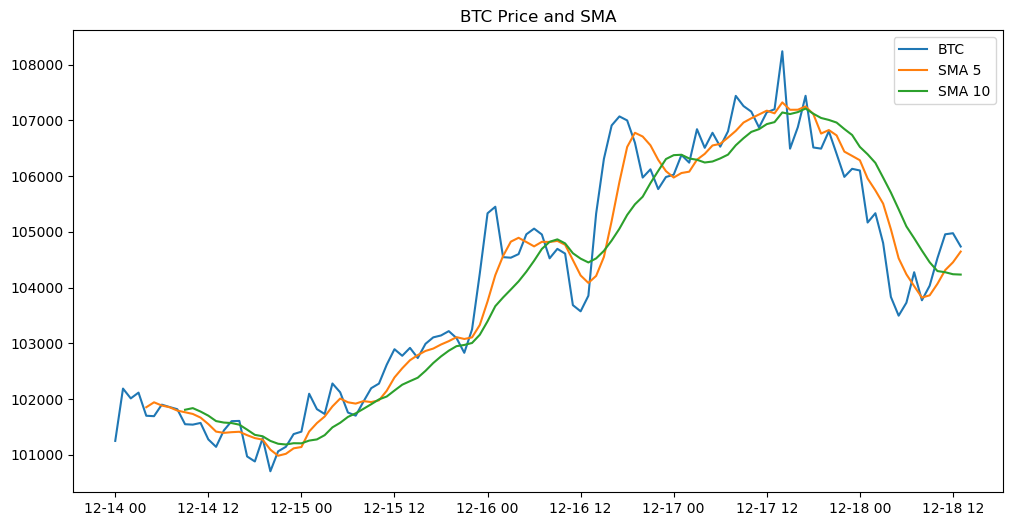

In [2]:
import matplotlib.pyplot as plt
import talib
import yfinance as yf

ticker = 'BTC-USD'
period = '5d'      
interval = '1h'     
sma_period = 9     

data = yf.download(ticker, period=period, interval=interval)

sma_5 = talib.SMA(data['Close'], timeperiod=5)
data['SMA_5'] = sma_5

sma_10 = talib.SMA(data['Close'], timeperiod=10)
data['SMA_10'] = sma_10

# Plot the EMAs with price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='BTC')
plt.plot(data['SMA_5'], label='SMA 5')
plt.plot(data['SMA_10'], label='SMA 10')



# Customize and show the plot
plt.legend()
plt.title('BTC Price and SMA')
plt.show()